In [1]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 32.4 MB/s 


In [1]:
from data_creation import DataSelection
from prediction_LSTM import SolarLSTM
import pickle

In [3]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

DataSelection(data, 2014, "./")
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.026805996894836426
Num GB used

In [4]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04668116569519043
Num GB used in data array: 0.04668116569519043
Num GB used i

In [2]:
import numpy as np

In [3]:
data2014 = np.load("data_2014.npy")
labels2014 = np.load("labels_2014.npy")

In [ ]:
# data2014.shape[0] % 64

In [ ]:
# # Need to adjust data size to ensure that each batch is of size 64
# adjusted_data = data2014[:data2014.shape[0]-18, :, :]
# adjusted_labels = labels2014[:labels2014.shape[0]-18, :, :]

In [7]:
base_model = SolarLSTM(data2014, labels2014, save_path="./")

In [8]:
base_model.build_model()

In [9]:
base_model.model

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.8766 - mse: 0.1046 - mae: 0.2127

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 33s 92ms/step - loss: 0.3654 - accuracy: 0.8766 - mse: 0.1046 - mae: 0.2127 - val_loss: 0.5875 - val_accuracy: 0.8094 - val_mse: 0.1735 - val_mae: 0.2412
Epoch 2/50
320/320 [==============================] - 21s 64ms/step - loss: 0.2932 - accuracy: 0.8930 - mse: 0.0821 - mae: 0.1647 - val_loss: 0.6178 - val_accuracy: 0.8094 - val_mse: 0.1739 - val_mae: 0.2568
Epoch 3/50
320/320 [==============================] - 20s 64ms/step - loss: 0.2838 - accuracy: 0.9012 - mse: 0.0770 - mae: 0.1553 - val_loss: 0.6368 - val_accuracy: 0.6891 - val_mse: 0.1928 - val_mae: 0.3107
Epoch 4/50
320/320 [==============================] - 21s 65ms/step - loss: 0.2580 - accuracy: 0.9191 - mse: 0.0692 - mae: 0.1419 - val_loss: 0.6476 - val_accuracy: 0.8094 - val_mse: 0.1757 - val_mae: 0.2160
Epoch 5/50
320/320 [==============================] - ETA: 0s - loss: 0.2803 - accuracy: 0.9088 - mse: 0.0760 - mae: 0.1492

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 29s 91ms/step - loss: 0.2803 - accuracy: 0.9088 - mse: 0.0760 - mae: 0.1492 - val_loss: 0.5329 - val_accuracy: 0.8175 - val_mse: 0.1567 - val_mae: 0.2227
Epoch 6/50
320/320 [==============================] - 21s 64ms/step - loss: 0.2605 - accuracy: 0.9099 - mse: 0.0724 - mae: 0.1470 - val_loss: 0.5902 - val_accuracy: 0.8082 - val_mse: 0.1618 - val_mae: 0.2323
Epoch 7/50
320/320 [==============================] - 21s 65ms/step - loss: 0.2589 - accuracy: 0.9266 - mse: 0.0670 - mae: 0.1339 - val_loss: 0.6152 - val_accuracy: 0.8093 - val_mse: 0.1712 - val_mae: 0.2219
Epoch 8/50
320/320 [==============================] - 21s 66ms/step - loss: 0.2380 - accuracy: 0.9259 - mse: 0.0630 - mae: 0.1306 - val_loss: 0.6009 - val_accuracy: 0.7776 - val_mse: 0.1747 - val_mae: 0.2550
Epoch 9/50
320/320 [==============================] - 21s 65ms/step - loss: 0.2298 - accuracy: 0.9283 - mse: 0.0617 - mae: 0.1249 - val_loss: 0.6347 - val_accuracy: 0.8078 - val_m

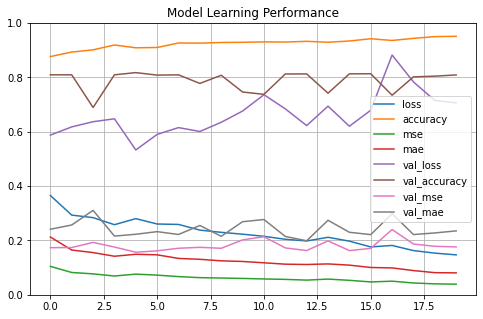

In [10]:
history=base_model.fit()

In [8]:
data2015 = np.load("data_2015.npy")
labels2015 = np.load("labels_2015.npy")

In [9]:
data2015.shape

(28486, 120, 38)

In [13]:
data_new = base_model.batch_prefetch_data(data2015,labels2015,split_data=False)
base_model.evaluate(data_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 10s 21ms/step - loss: 0.6691 - accuracy: 0.8023 - mse: 0.1629 - mae: 0.2075


[0.6690995693206787,
 0.8022840619087219,
 0.16289202868938446,
 0.20747098326683044]

In [ ]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = base_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%base_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix = base_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [15]:
#If you want to customize the confusion matrix plot, can uncomment below and use the plot handle below
#conf_plt_handle=base_model.plot_confusion_matrix(conf_matrix)

In [16]:
conf_matrix

array([[  90185,  473455],
       [ 204978, 2648982]])

In [17]:
#Example of using the __call__ dunder method to pass data
call_preds=base_model(batched_2015)

In [15]:
import pandas as pd

def calculate_statistics(conf_matrix):
  tp = conf_matrix[1][1]
  fp = conf_matrix[1][0]
  tn = conf_matrix[0][0]
  fn = conf_matrix[0][1]

  # Precision - TP/(TP+FP)
  precision = tp / np.sum([tp, fp])

  # Recall - TP/(TP+FN)
  recall = tp / np.sum([tp, fn])

  # False Alarm Rate/Probability of False Alarm - FP/(FP+TN)
  far = fp / np.sum([fp, tn])

  # Heidke Skill Score (HSS) - 2*(TP * TN - FP * FN) / (TP+FN)*(FN+TN)+(TP+FP)*(FP+TN)
  hss = (2 * ((tp*tn) - (fp*fn))) / (((tp+fn)*(fn+tn)) + ((tp+tn)*(fp+tn)))

  return pd.DataFrame({"precision": precision, "recall": recall, "far": far, "hss": hss}, index=[0])

In [32]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.928178,0.84837,0.694457,0.110457


In [4]:
from tensorflow import keras
keras.backend.clear_session()

In [5]:
tuned_model = SolarLSTM(data2014, labels2014, "./", tune=True)

Trial 10 Complete [00h 06m 59s]
val_accuracy: 0.8156917095184326

Best val_accuracy So Far: 0.8275374174118042
Total elapsed time: 01h 50m 10s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8826 - mse: 0.1095 - mae: 0.2211

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 34s 95ms/step - loss: 0.3907 - accuracy: 0.8826 - mse: 0.1095 - mae: 0.2211 - val_loss: 0.5295 - val_accuracy: 0.8094 - val_mse: 0.1634 - val_mae: 0.2496
Epoch 2/50
320/320 [==============================] - 22s 69ms/step - loss: 0.3341 - accuracy: 0.8996 - mse: 0.0922 - mae: 0.1833 - val_loss: 0.5519 - val_accuracy: 0.8094 - val_mse: 0.1668 - val_mae: 0.2391
Epoch 3/50
320/320 [==============================] - 22s 68ms/step - loss: 0.3180 - accuracy: 0.8996 - mse: 0.0886 - mae: 0.1743 - val_loss: 0.5776 - val_accuracy: 0.8094 - val_mse: 0.1699 - val_mae: 0.2281
Epoch 4/50
320/320 [==============================] - 21s 67ms/step - loss: 0.3006 - accuracy: 0.8938 - mse: 0.0831 - mae: 0.1658 - val_loss: 0.5367 - val_accuracy: 0.8094 - val_mse: 0.1589 - val_mae: 0.2173
Epoch 5/50
320/320 [==============================] - 21s 67ms/step - loss: 0.2843 - accuracy: 0.8936 - mse: 0.0789 - mae: 0.1564 - val_loss: 0.6038 - val_accuracy: 0.8158 - val_m

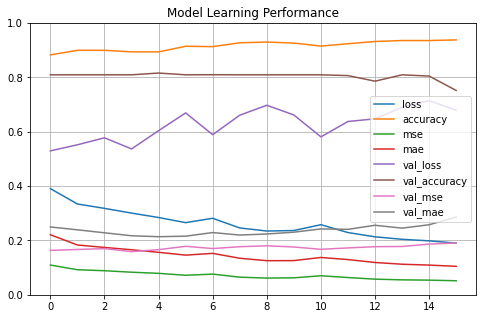

In [6]:
tuned_model.fit()

In [13]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = tuned_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%tuned_model.batch_size)]

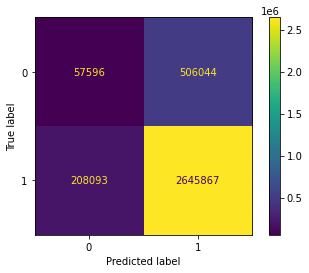

In [14]:
conf_matrix = tuned_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [16]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.927086,0.839449,0.78322,0.037748


In [17]:
tuned_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             3520      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 5,649
Trainable params: 5,649
Non-trainable params: 0
_________________________________________________________________
